# Graph Signal Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting

In [2]:
plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10, 5)

## Graphs

In [4]:
rs = np.random.RandomState(42)  # Reproducible results.
W = rs.uniform(size=(30, 30))  # Full graph.
W[W < 0.93] = 0  # Sparse graph.
W = W + W.T  # Symmetric graph.
np.fill_diagonal(W, 0)  # No self-loops.
G = graphs.Graph(W)
print('{} nodes, {} edges'.format(G.N, G.Ne))

30 nodes, 60 edges


In [5]:
G.is_connected()

True

In [6]:
G.is_directed()

False

In [7]:
(G.W == W).all()

True

In [12]:
type(G.W)

scipy.sparse.lil.lil_matrix

In [13]:
# The graph Laplacian (combinatorial by default).
G.L.shape

(30, 30)

In [14]:
G.compute_fourier_basis()
G.U.shape

(30, 30)

In [15]:
G.compute_differential_operator()
G.D.shape

(60, 30)

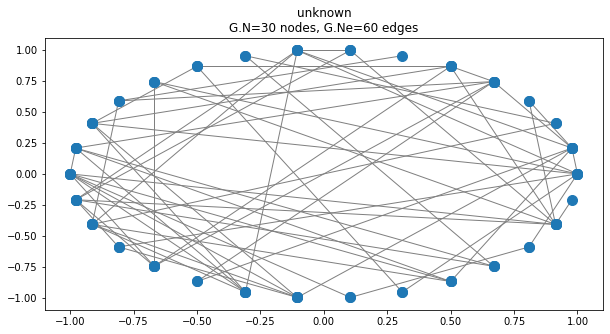

In [18]:
G.set_coordinates('ring2D')
G.plot()

## Fourier basis

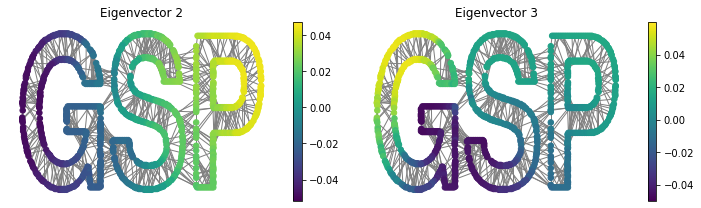

In [19]:
G = graphs.Logo()
G.compute_fourier_basis()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for i, ax in enumerate(axes):
    G.plot_signal(G.U[:, i+1], vertex_size=30, ax=ax)
    _ = ax.set_title('Eigenvector {}'.format(i+2))
    ax.set_axis_off()
fig.tight_layout()

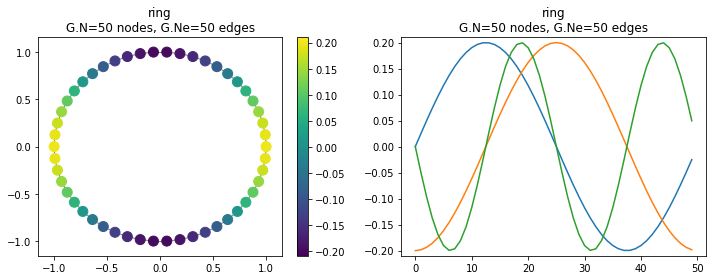

In [21]:
G2 = graphs.Ring(N=50)
G2.compute_fourier_basis()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G2.plot_signal(G2.U[:, 4], ax=axes[0])
G2.set_coordinates('line1D')
G2.plot_signal(G2.U[:, 1:4], ax=axes[1])
fig.tight_layout()

## Filters

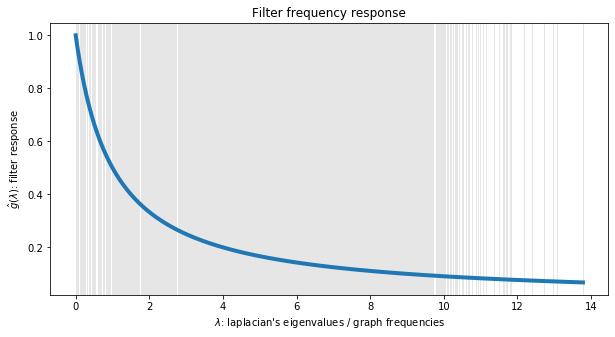

In [22]:
tau = 1
def g(x):
    return 1. / (1. + tau * x)
g = filters.Filter(G, g)

fig, ax = plt.subplots()
g.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('Filter frequency response')

In [23]:
# Graph signal: each letter gets a different value + additive noise.
s = np.zeros(G.N)
s[G.info['idx_g']-1] = -1
s[G.info['idx_s']-1] = 0
s[G.info['idx_p']-1] = 1
s += rs.uniform(-0.5, 0.5, size=G.N)

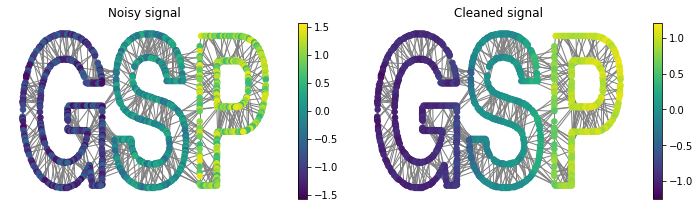

In [24]:
s2 = g.filter(s)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
G.plot_signal(s, vertex_size=30, ax=axes[0])
_ = axes[0].set_title('Noisy signal')
axes[0].set_axis_off()
G.plot_signal(s2, vertex_size=30, ax=axes[1])
_ = axes[1].set_title('Cleaned signal')
axes[1].set_axis_off()
fig.tight_layout()